# Tâche 8

## Import des données

In [1]:
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.plotter import BSPlotter
import numpy as np
import matplotlib.pyplot as plt
with MPRester("JHBtSyD6TnKgmAas") as m:
    bandstructure = m.get_bandstructure_by_material_id('mp-5077') # Structure de bandes de NaLi2Sb

## Visualisation de la structure de bandes électroniques

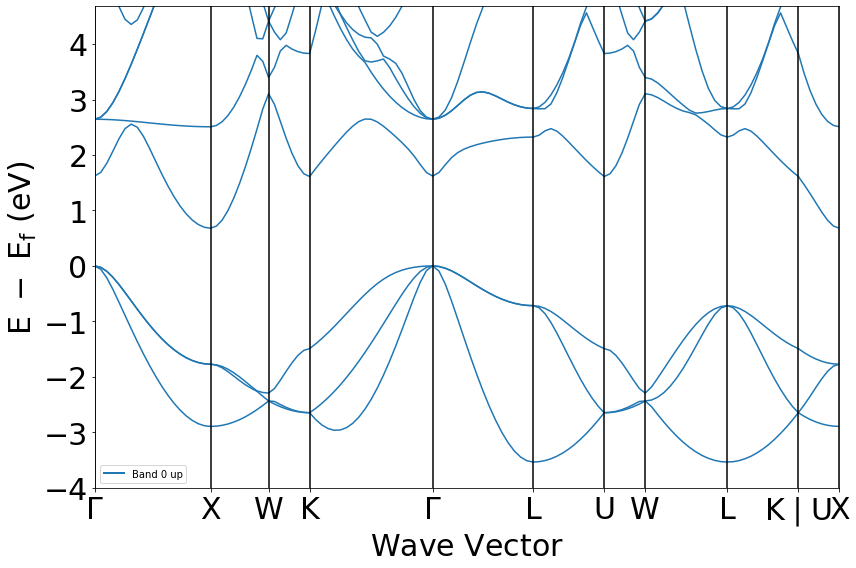

In [2]:
plot = BSPlotter(bandstructure)
plot.show()

## Bande interdite

In [3]:
print("La bande interdite est indirecte et s'étend sur " + "{0:.4f}".format(bandstructure.get_band_gap()['energy']) + " eV dans la direction " + bandstructure.get_band_gap()['transition'])

La bande interdite est indirecte et s'étend sur 0.6796 eV dans la direction \Gamma-X


## Directions présentant les dispersions minimales et maximales

Les directions présentant les dispersions minimales et maximales sont graphiquement celles avec les pentes minimales et maximales. Nous devons donc récupérer toutes les pentes de la dernière bande de valence et de la première bande de conduction et garder celles qui sont minimales et maximales.

In [4]:
dist = plot.bs_plot_data()['ticks']['distance']
index_valence = list(bandstructure.get_vbm()['band_index'].values())[0][-1]
index_conduction = list(bandstructure.get_cbm()['band_index'].values())[0][0]
valence_band = list(bandstructure.bands.values())[0][index_valence]
conduction_band = list(bandstructure.bands.values())[0][index_conduction]
i = 0
j = 0
valence_slopes = []
conduction_slopes = []
valence_vals = []
conduction_vals = []
labels = []
x = []
for point in bandstructure.kpoints:
    if point.label is not None and i != 125 :
        if (len(labels) == 0 or labels[-1] != point.label):
            valence_vals.append(valence_band[i]-bandstructure.efermi)
            conduction_vals.append(conduction_band[i]-bandstructure.efermi)
            if len(valence_vals) > 1 :
                valence_slopes.append(abs((valence_vals[-1] - valence_vals[-2])/(dist[j]-dist[j-1])))
                conduction_slopes.append(abs((conduction_vals[-1] - conduction_vals[-2])/(dist[j]-dist[j-1])))
            labels.append(point.label)
            x.append(dist[j])
        j+=1
    elif i == 125 :
        labels[-1] = 'K$\\mid$U'
    i+=1
    
valence_disp_max_index = valence_slopes.index(max(valence_slopes))
valence_disp_min_index = valence_slopes.index(min(valence_slopes))
conduction_disp_max_index = conduction_slopes.index(max(conduction_slopes))
conduction_disp_min_index = conduction_slopes.index(min(conduction_slopes))
print("La direction de la dernière bande de valence présentant le plus de dispersion (en rouge ci-dessous) est la direction : " + labels[valence_disp_max_index] + "-" + labels[valence_disp_max_index+1])
print("Celle présentant le moins de dispersion (en orange ci-dessous) est la direction : " + labels[valence_disp_min_index] + "-" + labels[valence_disp_min_index+1])
print("La direction de la première bande de conduction présentant le plus de dispersion (en vert ci-dessous) est la direction : " + labels[conduction_disp_max_index] + "-" + labels[conduction_disp_max_index+1])
print("Celle présentant le moins de dispersion (en mauve ci-dessous) est la direction : " + labels[conduction_disp_min_index] + "-" + labels[conduction_disp_min_index+1])

La direction de la dernière bande de valence présentant le plus de dispersion (en rouge ci-dessous) est la direction : U-W
Celle présentant le moins de dispersion (en orange ci-dessous) est la direction : K$\mid$U-X
La direction de la première bande de conduction présentant le plus de dispersion (en vert ci-dessous) est la direction : X-W
Celle présentant le moins de dispersion (en mauve ci-dessous) est la direction : K-\Gamma


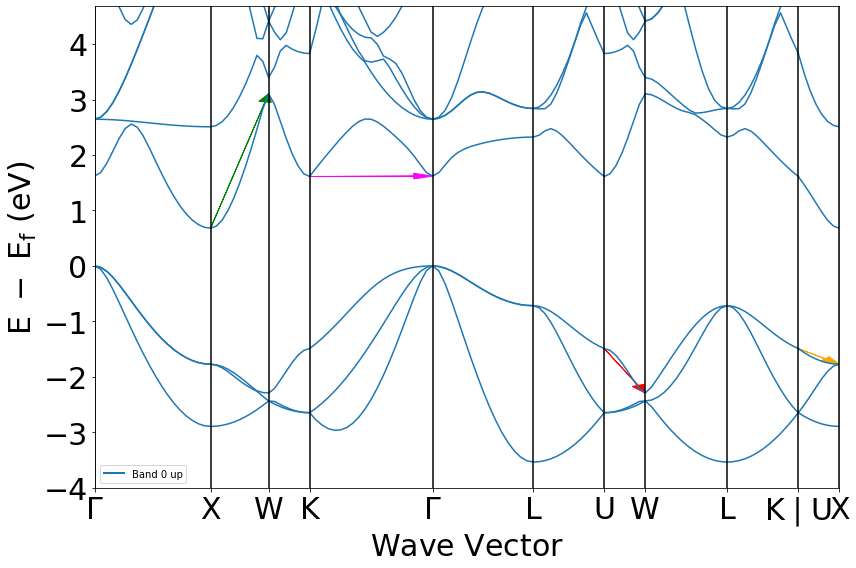

In [5]:
shift = plot.bs_plot_data()['cbm'][0][1] - conduction_vals[conduction_disp_max_index]
plot.get_plot()
plt.arrow(x[valence_disp_max_index],shift+valence_vals[valence_disp_max_index],x[valence_disp_max_index+1]-x[valence_disp_max_index],valence_vals[valence_disp_max_index+1]-valence_vals[valence_disp_max_index],head_width=0.1,length_includes_head=True, color='red')
plt.arrow(x[valence_disp_min_index],shift+valence_vals[valence_disp_min_index],x[valence_disp_min_index+1]-x[valence_disp_min_index],valence_vals[valence_disp_min_index+1]-valence_vals[valence_disp_min_index],head_width=0.1,length_includes_head=True, color='orange')
plt.arrow(x[conduction_disp_max_index],shift+conduction_vals[conduction_disp_max_index],x[conduction_disp_max_index+1]-x[conduction_disp_max_index],conduction_vals[conduction_disp_max_index+1]-conduction_vals[conduction_disp_max_index],head_width=0.1,length_includes_head=True, color='green')
plt.arrow(x[conduction_disp_min_index],shift+conduction_vals[conduction_disp_min_index],x[conduction_disp_min_index+1]-x[conduction_disp_min_index],conduction_vals[conduction_disp_min_index+1]-conduction_vals[conduction_disp_min_index],head_width=0.1,length_includes_head=True, color='magenta')
plt.show()

## Masse effective

En supposant une dispersion parabolique, on peut calculer que l'énergie en fonction de la masse effective est de la forme : $E-E_0=\frac{\hbar^2 k^2}{2m^*}$ avec $E-E_0$ l'énergie de l'électron. Et donc la masse effective a comme formule : $m^*=\frac{\hbar^2 k^2}{2(E-E_0)}$.

In [6]:
h_bar = 1.054571817e-34 # in J.s
a = [ 9.17555788e-01,  0.00000000e+00,  0.00000000e+00] # in angstrom-1
valence_k = np.linalg.norm(bandstructure.get_vbm()['kpoint'].cart_coords+a)*1e10 # in meters-1
valence_E = bandstructure.get_vbm()['energy']*1.602177e-19 # in J
conduction_k = np.linalg.norm(bandstructure.get_cbm()['kpoint'].cart_coords+a)*1e10 # in meters-1
conduction_E = bandstructure.get_cbm()['energy']*1.602177e-19 # in J
valence_m = h_bar**2*valence_k**2/(2*valence_E) # in kg
conduction_m = h_bar**2*conduction_k**2/(2*conduction_E) # in kg
print("La masse effective au sommet de la dernière bande de valence est " + str(valence_m) + " kg")
print("La masse effective à la base de la première bande de conduction est " + str(conduction_m) + " kg")

La masse effective au sommet de la dernière bande de valence est 8.318085252324372e-31 kg
La masse effective à la base de la première bande de conduction est 1.3939399807264365e-30 kg
